In [1]:
import molsysmt as msm
import omembrane as omem
from molsysmt import pyunitwizard as puw
from openmm import unit as u
from matplotlib import pyplot as plt

In [2]:
molsys = msm.convert('memb_popc_100_stage_3_3.h5msm')

In [3]:
bins_edges, density = omem.analysis.get_lineal_density(molsys, selection = 'atom_type=="C" and molecule_type=="lipid"',
                                                       axis = [0,0,1])

/fast_data/home/diego/repos@uibcdf/OMembrane/omembrane/analysis/get_lineal_density.py:17: NotDigestedArgumentWarning: The origin_at_center from molsysmt.pbc.wrap_to_pbc.wrap_to_pbc argument was not digested.Check  for more information. If you still need help, open a new issue in https://github.com/uibcdf/MolSysMT/issues.
  wrapped_dict = msm.pbc.wrap_to_pbc({'coordinates':coordinates, 'box':box}, origin_at_center=False)


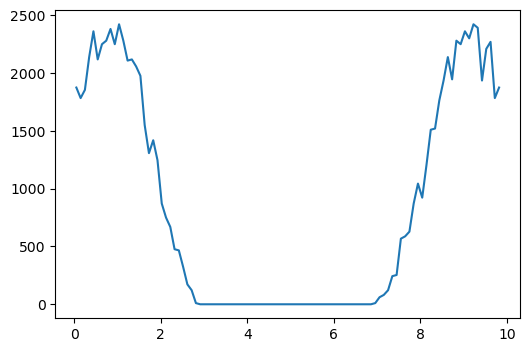

In [4]:
plt.rcParams["figure.figsize"] = (6,4)
plt.plot((bins_edges[1:]+bins_edges[:-1])/2, density)